In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm


In [2]:
df = pd.read_csv('2024_clean.csv')

print(df.head())

   YEAR  MONTH  DAY_OF_MONTH     FL_DATE MKT_UNIQUE_CARRIER  \
0  2024      1             1  2024-01-01                 AA   
1  2024      1             1  2024-01-01                 AA   
2  2024      1             1  2024-01-01                 AA   
3  2024      1             1  2024-01-01                 AA   
4  2024      1             1  2024-01-01                 AA   

   MKT_CARRIER_FL_NUM       ORIGIN_CITY_NAME DEST_CITY_NAME  CRS_DEP_TIME  \
0              1002.0            Madison, WI  Charlotte, NC           605   
1              1007.0          Charlotte, NC  St. Louis, MO          2255   
2              1009.0       Philadelphia, PA  Charlotte, NC          1737   
3              1010.0  Dallas/Fort Worth, TX  St. Louis, MO          2109   
4              1011.0          Las Vegas, NV  Charlotte, NC           800   

   DEP_TIME  ... DepHour  DepMinute  DepFraction  DepTime_sin   DepTime_cos  \
0     600.0  ...     6.0        0.0     6.000000     1.000000  6.123234e-17   


In [3]:
df.sample(5).T

,2627408,4710700,4989557,5341656,5217514
YEAR,2024,2024,2024,2024,2024
MONTH,5,8,9,9,9
DAY_OF_MONTH,14,21,4,21,15
FL_DATE,2024-05-14,2024-08-21,2024-09-04,2024-09-21,2024-09-15
MKT_UNIQUE_CARRIER,UA,UA,DL,DL,DL
MKT_CARRIER_FL_NUM,678.0,2273.0,1615.0,2808.0,4977.0
ORIGIN_CITY_NAME,"Los Angeles, CA","Denver, CO","Spokane, WA","Boise, ID","Birmingham, AL"
DEST_CITY_NAME,"Newark, NJ","New Orleans, LA","Minneapolis, MN","Minneapolis, MN","New York, NY"
CRS_DEP_TIME,1130,1125,600,530,925
DEP_TIME,1124.0,1119.0,557.0,530.0,915.0


In [4]:
df = df.tail(1000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 5538508 to 5539507
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 1000 non-null   int64  
 1   MONTH                1000 non-null   int64  
 2   DAY_OF_MONTH         1000 non-null   int64  
 3   FL_DATE              1000 non-null   object 
 4   MKT_UNIQUE_CARRIER   1000 non-null   object 
 5   MKT_CARRIER_FL_NUM   1000 non-null   float64
 6   ORIGIN_CITY_NAME     1000 non-null   object 
 7   DEST_CITY_NAME       1000 non-null   object 
 8   CRS_DEP_TIME         1000 non-null   int64  
 9   DEP_TIME             1000 non-null   float64
 10  DEP_DELAY            1000 non-null   object 
 11  CRS_ARR_TIME         1000 non-null   int64  
 12  ARR_TIME             1000 non-null   float64
 13  ARR_DELAY            1000 non-null   float64
 14  CANCELLED            1000 non-null   float64
 15  CRS_ELAPSED_TIME     1000 non

In [5]:
main_label = 'FlightDelay'
selected_features = ['MKT_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'DEP_DELAY', 'DISTANCE', 'Day', 'DepTime_sin', 'DepTime_cos']
# Split features into numerical and categorical
numerical_features = df[selected_features].select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df[selected_features].select_dtypes(include=['object']).columns.tolist()
# Automatically distinguish high-cardinality categorical features
low_cardinality_features = [col for col in categorical_features if df[col].nunique() <= 20]
high_cardinality_features = [col for col in categorical_features if df[col].nunique() > 20]
print("Numerical:", numerical_features)
print("Low Number Categorical:", low_cardinality_features)
print("High Number Categorical:", high_cardinality_features)

Numerical: ['DepTime_sin', 'DepTime_cos']
Low Number Categorical: ['MKT_UNIQUE_CARRIER', 'DEP_DELAY', 'DISTANCE', 'Day']
High Number Categorical: ['ORIGIN_CITY_NAME', 'DEST_CITY_NAME']


In [6]:
# Encode target variable
target_encoder = LabelEncoder()
df[main_label] = target_encoder.fit_transform(df[main_label])

# Save label encoder for decoding
joblib.dump(target_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [7]:
df.sample(5).T

,5539448,5538906,5538677,5539176,5538607
YEAR,2024,2024,2024,2024,2024
MONTH,9,9,9,9,9
DAY_OF_MONTH,30,30,30,30,30
FL_DATE,2024-09-30,2024-09-30,2024-09-30,2024-09-30,2024-09-30
MKT_UNIQUE_CARRIER,WN,WN,WN,WN,WN
MKT_CARRIER_FL_NUM,953.0,4722.0,4479.0,672.0,4389.0
ORIGIN_CITY_NAME,"Santa Ana, CA","Nashville, TN","St. Louis, MO","Sacramento, CA","San Diego, CA"
DEST_CITY_NAME,"San Jose, CA","Baltimore, MD","Des Moines, IA","Houston, TX","St. Louis, MO"
CRS_DEP_TIME,1845,1205,2130,915,635
DEP_TIME,1859.0,1202.0,2124.0,919.0,632.0


In [8]:
# Custom RandomForest with progress bar
class RandomForestWithProgress(RandomForestClassifier):
    def fit(self, X, y, **kwargs):
        with tqdm(total=self.n_estimators, desc="Training RandomForest") as pbar:
            for i, _ in enumerate(super().fit(X, y, **kwargs).estimators_):
                pbar.update(1)
        return self

In [9]:
# Train-test split
X = df[selected_features]
y = df[main_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

low_cardinality_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

high_cardinality_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('low_card', low_cardinality_transformer, low_cardinality_features),
        ('high_card', high_cardinality_transformer, high_cardinality_features)
    ],
    remainder='drop'  # Ensure original columns are dropped
)

# Models to test
models = {
    'RandomForest': RandomForestWithProgress(random_state=42),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}


In [10]:
# Train models and store results
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    print(f"Training {name}...")
    if name == 'XGBoost':
        pipeline.named_steps['classifier'].fit(
            X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=True
        )
        # Extract training history for XGBoost
        history = pipeline.named_steps['classifier'].evals_result()

        # Plot training curve
        plt.figure(figsize=(10, 6))
        plt.plot(history['validation_0']['mlogloss'], label='Training Loss')
        plt.plot(history['validation_1']['mlogloss'], label='Validation Loss')
        plt.title(f'{name} Training Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Log Loss')
        plt.legend()
        plt.show()
    else:
        pipeline.fit(X_train, y_train)

    # Save model
    joblib.dump(pipeline, f'{name}_FL_model.pkl')

    # # Evaluate on test data
    # y_pred = pipeline.predict(X_test)
    # acc = accuracy_score(y_test, y_pred)
    # print(f"Accuracy for {name}: {acc:.4f}\n")
    # print(classification_report(y_test, y_pred))

    # Evaluate on test data
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {acc:.4f}\n")
    print(classification_report(target_encoder.inverse_transform(y_test), target_encoder.inverse_transform(y_pred)))

    # Store results
    results[name] = {
        'pipeline': pipeline,
        'accuracy': acc,
        'y_pred': y_pred
    }

Training RandomForest...


Training RandomForest: 100%|████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 359.02it/s]


Accuracy for RandomForest: 0.1200

              precision    recall  f1-score   support

      -11_-9       0.21      0.17      0.19        23
     -13_-11       0.14      0.14      0.14        21
     -16_-13       0.13      0.15      0.14        27
     -20_-16       0.17      0.18      0.17        17
        -2_1       0.00      0.00      0.00        12
    -502_-20       0.20      0.25      0.22        12
       -5_-2       0.09      0.09      0.09        22
       -7_-5       0.03      0.05      0.04        20
       -9_-7       0.12      0.12      0.12        25
     12_1266       1.00      0.20      0.33         5
         1_5       0.00      0.00      0.00        10
        5_12       0.00      0.00      0.00         6

    accuracy                           0.12       200
   macro avg       0.17      0.11      0.12       200
weighted avg       0.14      0.12      0.12       200

Training LogisticRegression...
Accuracy for LogisticRegression: 0.1150

              precision   

D:\Anaconda3\envs\General\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\envs\General\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\General\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

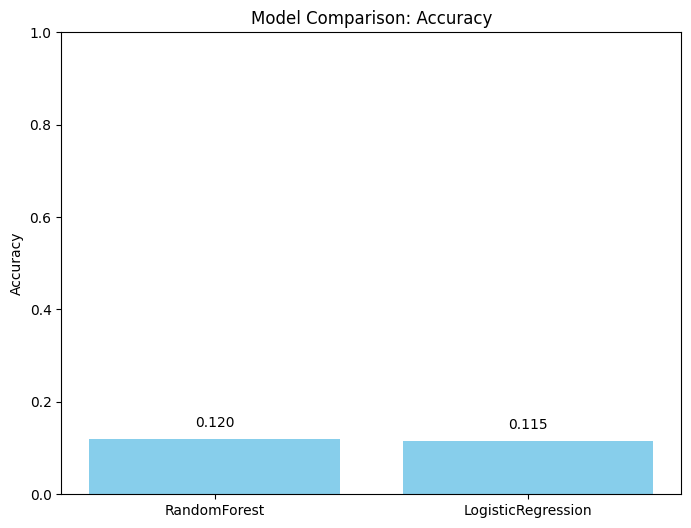

In [13]:
# Visualization: Model comparison
fig, ax = plt.subplots(figsize=(8, 6))
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
ax.bar(model_names, accuracies, color='skyblue')
ax.set_title('Model Comparison: Accuracy')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
for i, acc in enumerate(accuracies):
    ax.text(i, acc + 0.02, f'{acc:.3f}', ha='center', va='bottom')
plt.show()

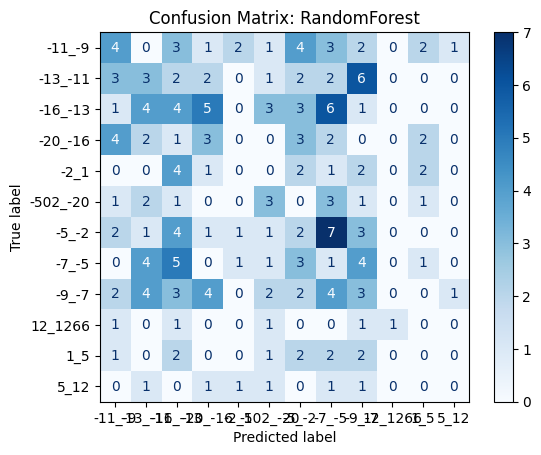

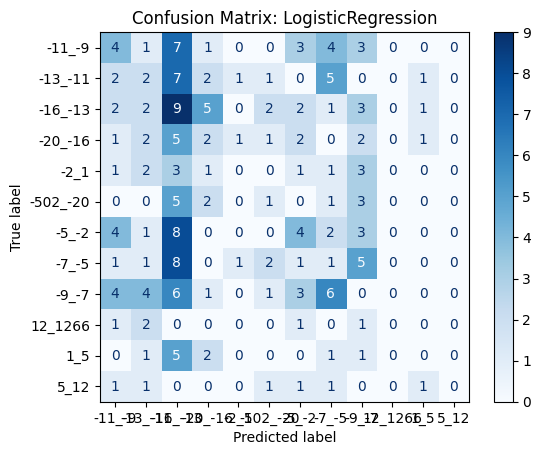

In [12]:
# Visualization: Confusion matrices
for name in results:
    disp = ConfusionMatrixDisplay.from_estimator(
        results[name]['pipeline'], X_test, y_test,
        display_labels=target_encoder.classes_,
        cmap=plt.cm.Blues
    )
    disp.ax_.set_title(f'Confusion Matrix: {name}')
    plt.show()
